# Behavioral result

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
sns.set_theme(style="darkgrid")

Participants number: 40
Adult number: 18
Adolescent number: 12
Children number: 10


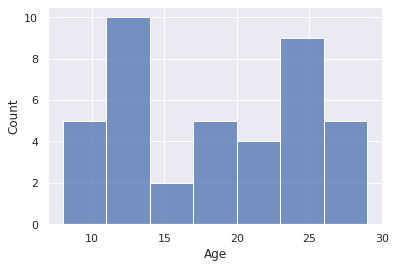

In [2]:
beha_total_score = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data = pd.read_csv(beha_total_score,sep='\t')
data = data[data['usable']==1]
adult_num = len(data[data['Age']>18])
ado_num = len(data.query("18>=Age>12"))
children_num = len(data[data['Age']<=12])

print("Participants number:", len(data))
print("Adult number:",adult_num)
print("Adolescent number:",ado_num)
print("Children number:", children_num)
g = sns.histplot(data['Age'])

## Training performance

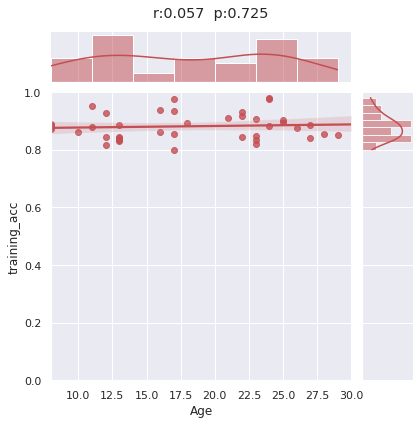

In [5]:
beha_total_score = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data = pd.read_csv(beha_total_score,sep='\t')
data = data[data['usable']==1]
data['training_acc'] = (data['train_ap'] + data['train_dp'])/2
#correlation
res = spearmanr(data['Age'],data['training_acc'])
r = round(res[0],3)
p = round(res[1],3)

# plot
g = sns.jointplot(x="Age", y="training_acc", data=data,
                  kind="reg", truncate=False,
                  xlim=(8, 30), ylim=(0, 1),
                  color="r", height=6)
#move overall title up
g.fig.subplots_adjust(top=0.92)
g.fig.suptitle('r:{}  p:{}'.format(r,p))


savepath = r'/mnt/workdir/DCM/BIDS/derivatives/behaviour/result/analysis/age-training.png'
g.savefig(savepath,bbox_inches='tight',pad_inches=0,dpi=300)

## Age - 1D Inference

40


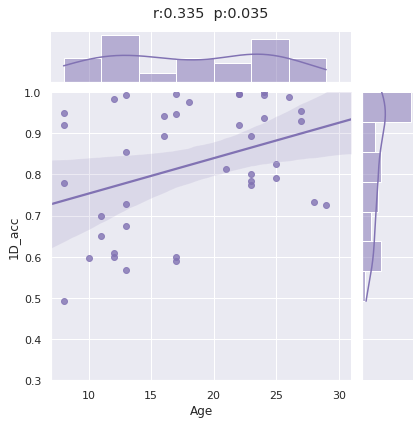

In [6]:
beha_total_score = r'//mnt/workdir/DCM/BIDS/participants.tsv'
data =  pd.read_csv(beha_total_score,sep='\t')
data = data[data['usable']==1]
data = data.dropna(subset=['Age','1D_acc'])
print(len(data))
res = spearmanr(data['Age'],data['1D_acc'])
r = round(res[0],3)
p = round(res[1],3)

# plot
g = sns.jointplot(x="Age", y="1D_acc", data=data,
                  kind="reg", truncate=False,
                  xlim=(7, 31), ylim=(0.3, 1),
                  color="m", height=6)

#move overall title up
g.fig.subplots_adjust(top=0.92)
g.fig.suptitle('r:{}  p:{}'.format(r,p))

savepath = r'/mnt/workdir/DCM/BIDS/derivatives/behaviour/result/analysis/age-1Dtask.png'
g.savefig(savepath,bbox_inches='tight',pad_inches=0,dpi=300)

## Age - 2D Inference game1

40


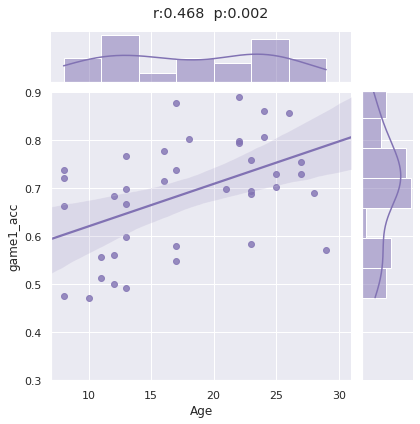

In [7]:
beha_total_score = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data =  pd.read_csv(beha_total_score,sep='\t')
data = data[data['usable']==1]

data = data.dropna(subset=['game1_acc','Age'])
print(len(data))
res = spearmanr(data['Age'],data['game1_acc'])
r = round(res[0],3)
p = round(res[1],3)

# plot
g = sns.jointplot(x="Age", y="game1_acc", data=data,
                  kind="reg", truncate=False,
                  xlim=(7, 31), ylim=(0.3, 0.9),
                  color="m", height=6)

#move overall title up
g.fig.subplots_adjust(top=0.92)
g.fig.suptitle('r:{}  p:{}'.format(r,p))

savepath = r'/mnt/workdir/DCM/BIDS/derivatives/behaviour/result/analysis/age-2Dgame1.png'
g.savefig(savepath,bbox_inches='tight',pad_inches=0,dpi=300)

### Age - 2D Inference game1 by controling training performance

In [10]:
import pingouin as pg
import pandas
import statsmodels.api as sm

beha_total_score = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data =  pd.read_csv(beha_total_score,sep='\t')
data = data[data['usable']==1]
data['training_acc'] = (data['train_ap'] + data['train_dp'])/2
pg.partial_corr(data=data, x='Age', y='game1_acc', covar='training_acc')

,n,r,CI95%,p-val
pearson,40,0.507122,"[0.23, 0.71]",0.000985


### Age - 2D Inference game1 by controling 1D performance

In [12]:
import pingouin as pg
import pandas
import statsmodels.api as sm

beha_total_score = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data =  pd.read_csv(beha_total_score,sep='\t')
data = data[data['usable']==1]
data['training_acc'] = (data['train_ap'] + data['train_dp'])/2
pg.partial_corr(data=data, x='Age', y='game1_acc', covar='1D_acc')

,n,r,CI95%,p-val
pearson,40,0.351013,"[0.04, 0.6]",0.028452


### Partial Regression

In [8]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
"""
beha_total_score = r'/mnt/data/Project/DCM/participants_tsv.xlsx'
data = pd.read_excel(beha_total_score)
data = data[data['usable']==1]
data['training_acc'] = (data['train_ap'] + data['train_dp'])/2

expend_regression = LinearRegression().fit(data[['Age']], data["1D_acc"])
total_regression = LinearRegression().fit(data[['Age']], data["game1_acc"])
expend_residuals = data["game1_acc"] - expend_regression.predict(data[['Age']])
total_residuals = data["game1_acc"] - total_regression.predict(data[['Age']])
plt.scatter(expend_residuals, total_residuals)
"""

/home/dell/Software/anaconda3/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.0, the latest is 0.5.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


'\nbeha_total_score = r\'/mnt/data/Project/DCM/participants_tsv.xlsx\'\ndata = pd.read_excel(beha_total_score)\ndata = data[data[\'usable\']==1]\ndata[\'training_acc\'] = (data[\'train_ap\'] + data[\'train_dp\'])/2\n\nexpend_regression = LinearRegression().fit(data[[\'Age\']], data["1D_acc"])\ntotal_regression = LinearRegression().fit(data[[\'Age\']], data["game1_acc"])\nexpend_residuals = data["game1_acc"] - expend_regression.predict(data[[\'Age\']])\ntotal_residuals = data["game1_acc"] - total_regression.predict(data[[\'Age\']])\nplt.scatter(expend_residuals, total_residuals)\n'

In [9]:
"""
import pandas as pd
import statsmodels.api as sm
beha_total_score = r'/mnt/data/Project/DCM/BIDS/participants.tsv'
data =  pd.read_csv(beha_total_score,sep='\t')
data = data[data['usable']==1]
data['training_acc'] = (data['train_ap'] + data['train_dp'])/2
data['oneDacc'] = data['1D_acc']
sm.graphics.plot_partregress("game1_acc", "oneDacc", ["Age"], data=data,obs_labels=False)
"""

'\nimport pandas as pd\nimport statsmodels.api as sm\nbeha_total_score = r\'/mnt/data/Project/DCM/BIDS/participants.tsv\'\ndata =  pd.read_csv(beha_total_score,sep=\'\t\')\ndata = data[data[\'usable\']==1]\ndata[\'training_acc\'] = (data[\'train_ap\'] + data[\'train_dp\'])/2\ndata[\'oneDacc\'] = data[\'1D_acc\']\nsm.graphics.plot_partregress("game1_acc", "oneDacc", ["Age"], data=data,obs_labels=False)\n'

### Age - game2 

38


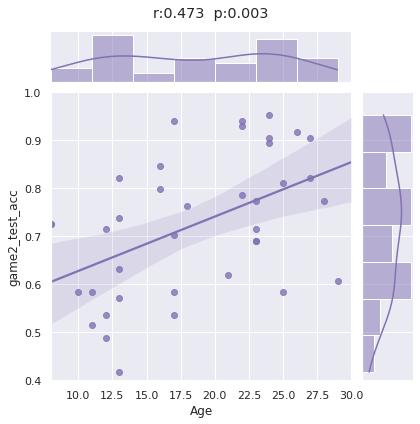

In [13]:
#age-game2
beha_total_score = r'//mnt/workdir/DCM/BIDS/participants.tsv'
data =  pd.read_csv(beha_total_score,sep='\t')
data = data[data['usable']==1]
data_droped = data.dropna(subset=['game2_test_acc'])
print(len(data_droped))
# plot
g = sns.jointplot(x="Age", y="game2_test_acc", data=data_droped,
                  kind="reg", truncate=False,
                  xlim=(8, 30), ylim=(0.4, 1),
                  color="m", height=6)

# cal correlation
res = spearmanr(data_droped['Age'],data_droped['game2_test_acc'])
r = round(res[0],3)
p = round(res[1],3)

#move overall title up
g.fig.subplots_adjust(top=0.92)
g.fig.suptitle('r:{}  p:{}'.format(r,p))
savepath = r'/mnt/workdir/DCM/BIDS/derivatives/behaviour/result/analysis/age-2Dgame2test.png'
g.savefig(savepath,bbox_inches='tight',pad_inches=0,dpi=300)

# game2train-test

<ipython-input-14-132e55264960>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_droped['game2train_acc'] = game2train_acc


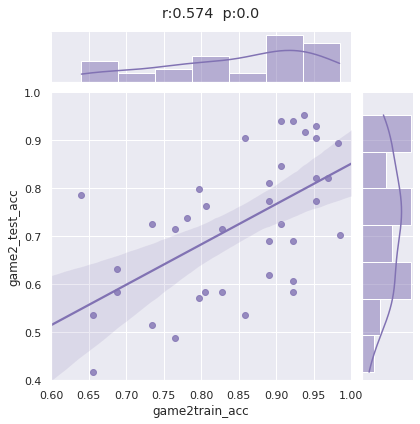

In [14]:
#game2train-test
beha_total_score = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data =  pd.read_csv(beha_total_score,sep='\t')
data = data[data['usable']==1]
data_droped = data.dropna(subset=['game1_acc','game2_test_acc'])
game2train_acc = (data_droped['game2_train_ap'] + data_droped['game2_train_dp'])/2
data_droped['game2train_acc'] = game2train_acc

# plot
g = sns.jointplot(x="game2train_acc", y="game2_test_acc", data=data_droped,
                  kind="reg", truncate=False,
                  xlim=(0.6, 1), ylim=(0.4, 1),
                  color="m", height=6)

# cal correlation
res = spearmanr(data_droped['game2train_acc'],data_droped['game2_test_acc'])
r = round(res[0],3)
p = round(res[1],3)

#move overall title up
g.fig.subplots_adjust(top=0.92)
g.fig.suptitle('r:{}  p:{}'.format(r,p))
savepath = r'/mnt/workdir/DCM/BIDS/derivatives/behaviour/result/analysis/game2train-test.png'
g.savefig(savepath,bbox_inches='tight',pad_inches=0,dpi=300)

# game1acc-game2train

<ipython-input-15-510ebc8b3d7d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_droped['game2train_acc'] = game2train_acc


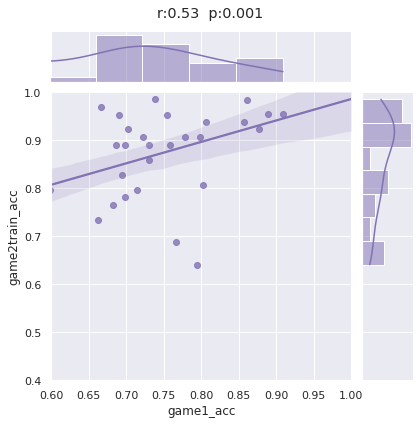

In [15]:
#game2train-test
beha_total_score = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data =  pd.read_csv(beha_total_score,sep='\t')
data = data[data['usable']==1]
data_droped = data.dropna(subset=['game1_acc','game2_test_acc'])
game2train_acc = (data_droped['game2_train_ap'] + data_droped['game2_train_dp'])/2
data_droped['game2train_acc'] = game2train_acc

# plot
g = sns.jointplot(x="game1_acc", y="game2train_acc", data=data_droped,
                  kind="reg", truncate=False,
                  xlim=(0.6, 1), ylim=(0.4, 1),
                  color="m", height=6)

# cal correlation
res = spearmanr(data_droped['game1_acc'],data_droped['game2train_acc'])
r = round(res[0],3)
p = round(res[1],3)

#move overall title up
g.fig.subplots_adjust(top=0.92)
g.fig.suptitle('r:{}  p:{}'.format(r,p))
savepath = r'/mnt/workdir/DCM/BIDS/derivatives/behaviour/result/analysisgame1acc-game2train.png'
g.savefig(savepath,bbox_inches='tight',pad_inches=0,dpi=300)

###  Age -  correlation between game1 and game2

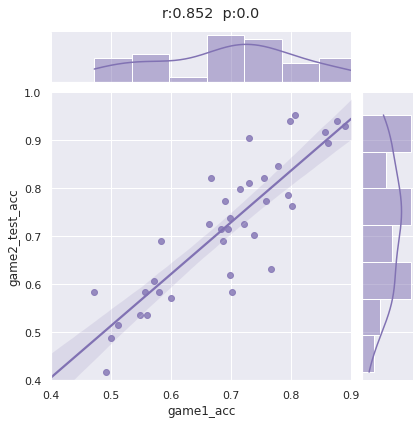

In [16]:
beha_total_score = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data =  pd.read_csv(beha_total_score,sep='\t')
data = data[data['usable']==1]

# plot
g = sns.jointplot(x="game1_acc", y="game2_test_acc", data=data,
                  kind="reg", truncate=False,
                  xlim=(0.4, 0.9), ylim=(0.4, 1),
                  color="m", height=6)


data_droped = data.dropna(subset=['game1_acc','game2_test_acc'])
res = spearmanr(data_droped['game1_acc'],data_droped['game2_test_acc'])
r = round(res[0],3)
p = round(res[1],5)

#move overall title up
g.fig.subplots_adjust(top=0.92)
g.fig.suptitle('r:{}  p:{}'.format(r,p))

savepath = r'/mnt/workdir/DCM/BIDS/derivatives/behaviour/result/analysis/game1-game2.png'
g.savefig(savepath,bbox_inches='tight',pad_inches=0,dpi=300)

In [17]:
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm

beha_total_score = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data =  pd.read_csv(beha_total_score,sep='\t')
data = data[data['usable']==1]
data['training_acc'] = (data['train_ap'] + data['train_dp'])/2
data = data.dropna(subset=['game1_acc','train_dp','train_dp','training_acc','1D_acc','Age'])

print(len(data))
X = data[['Age','training_acc','1D_acc']]
Y = data['game1_acc']

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
model_summary = model.summary()
print(model_summary)

40
                            OLS Regression Results                            
Dep. Variable:              game1_acc   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     59.85
Date:                Mon, 21 Mar 2022   Prob (F-statistic):           4.58e-14
Time:                        23:43:21   Log-Likelihood:                 64.307
No. Observations:                  40   AIC:                            -120.6
Df Residuals:                      36   BIC:                            -113.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.1775      0.165     -1.072

In [7]:
import pandas as pd
beha_total_score = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data =  pd.read_csv(beha_total_score,sep='\t')
data = data[data['usable']==1]
data['training_acc'] = (data['train_ap'] + data['train_dp'])/2

In [8]:
data[['Age','training_acc','1D_acc','game1_acc']]

,Age,training_acc,1D_acc,game1_acc
9,22.0,0.8450,0.921,0.794
10,11.0,0.9525,0.650,0.556
11,11.0,0.8775,0.700,0.512
14,12.0,0.9275,0.983,0.683
15,16.0,0.8600,0.892,0.714
16,10.0,0.8625,0.598,0.472
17,25.0,0.8975,0.825,0.730
21,13.0,0.8850,0.729,0.667
22,23.0,0.8200,0.783,0.694
23,27.0,0.8400,0.929,0.754


In [5]:
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm

beha_total_score = r'/mnt/data/Project/DCM/BIDS/participants.tsv'
data =  pd.read_csv(beha_total_score,sep='\t')
data = data[data['usable']==1]
data_droped = data.dropna(subset=['game1_acc','game2_test_acc'])
game2train_acc = ((data_droped['game2_train_ap'] + data_droped['game2_train_dp'])/2).to_list()
data_droped['game2train_acc'] = game2train_acc
print(len(data_droped))

X = data_droped[['game1_acc','game2train_acc','Age']]
Y = data_droped['game2_test_acc']

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
model_summary = model.summary()
print(model_summary)

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/Project/DCM/BIDS/participants.tsv'